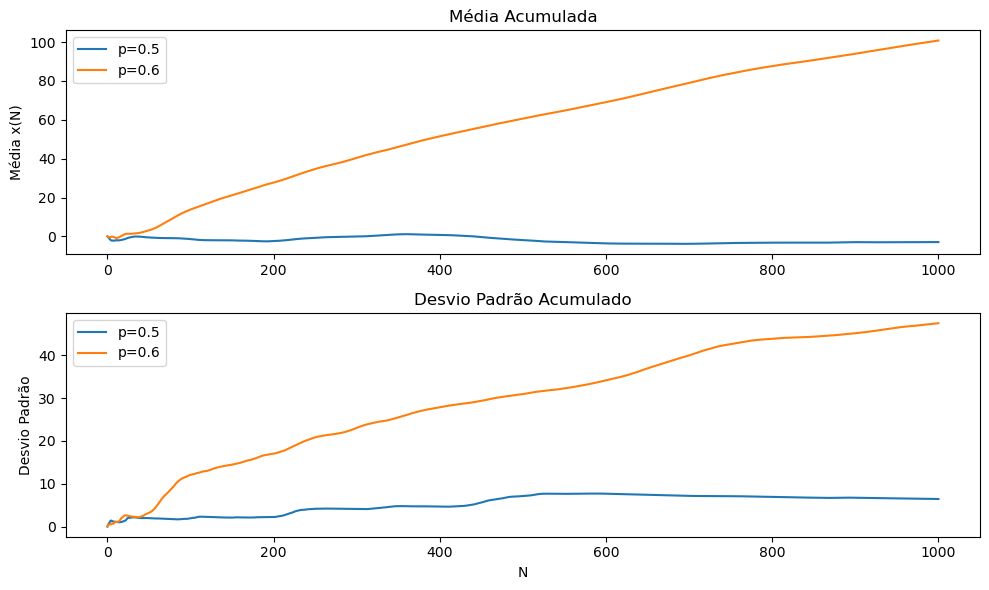

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

class PasseioAleatorio:
    def __init__(self, p, N):
        """
        Parâmetros:
        p (float): Probabilidade de movimento para a direita
        N (int): Número de passos no passeio
        """
        self.p = p
        self.N = N
    
    def função_passeio(self):
        """
        Gera um passeio aleatório usando rng.choice() e np.cumsum()
        
        Retorna:
        array: Posições do passeio aleatório
        """
        rng = np.random.default_rng()
        passos = rng.choice([1, -1], size=self.N, p=[self.p, 1-self.p])
        
        x = np.concatenate(([0], np.cumsum(passos)))
        
        return x

p = [0.5, 0.6]        

plt.figure(figsize=(10, 6))

for prob in p:
    valores = PasseioAleatorio(prob, 1000)
    valores_posicao = valores.função_passeio()
    media_pontos = []
    desvios_padrao = []
    soma = 0
    
    #Lista para armazenar valores anteriores ao longo do passeio
    valores_parciais = []
    
    #média acumulada em cada ponto
    for i in range(len(valores_posicao)):
        soma += valores_posicao[i]
        media = soma / (i + 1)
        media_pontos.append(media)
        
        valores_parciais.append(valores_posicao[i])
        
        #desvio padrão acumulativo usando np.std
        desvio_padrao = np.std(valores_parciais)
        desvios_padrao.append(desvio_padrao)

    #média
    plt.subplot(2, 1, 1)
    plt.plot(range(len(media_pontos)), media_pontos, label=f'p={prob}')
    plt.ylabel('Média x(N)')
    plt.title('Média Acumulada')
    plt.legend()

    #desvio padrão
    plt.subplot(2, 1, 2)
    plt.plot(range(len(desvios_padrao)), desvios_padrao, label=f'p={prob}')
    plt.xlabel('N')
    plt.ylabel('Desvio Padrão')
    plt.title('Desvio Padrão Acumulado')
    plt.legend()

plt.tight_layout()
plt.show()